In [1]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

print(f"Shape of train images: {train_imgs.shape}")
print(f"Shape of train labels: {train_labels.shape}\n")
print(f"Shape of test images: {test_imgs.shape}")
print(f"Shape of test labels: {test_labels.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape of train images: (60000, 28, 28)
Shape of train labels: (60000,)

Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


The label of this image is: 1


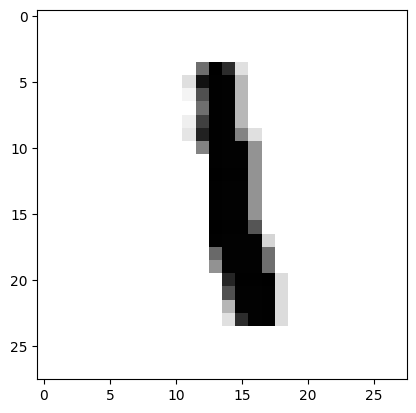

In [4]:
digit = 6
a = train_imgs[digit]
plt.imshow(a, cmap='gray_r')
print(f"The label of this image is: {train_labels[digit]}")

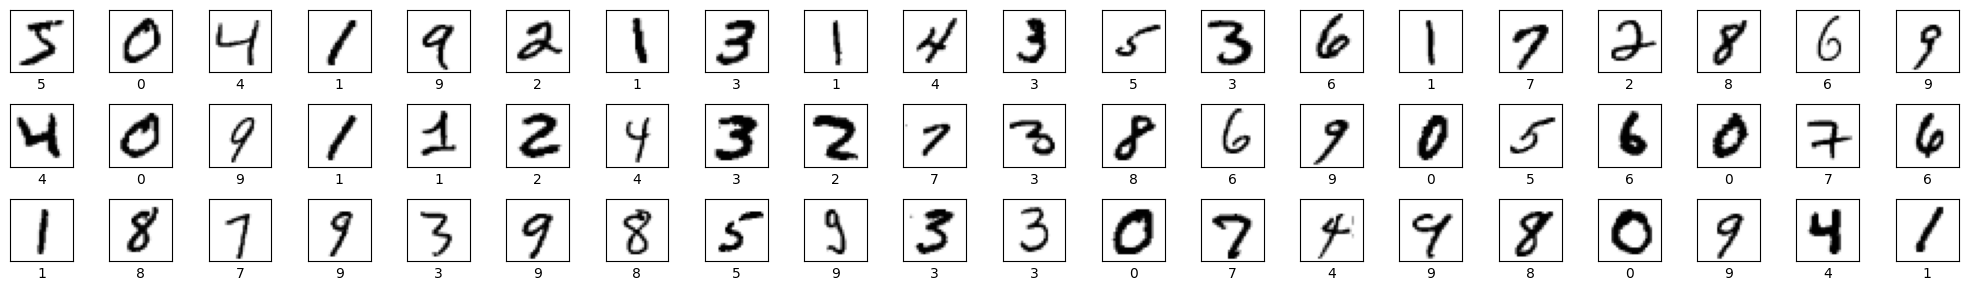

In [5]:
i = 0
rows=3
cols=20

plt.figure(figsize=(cols, rows))
for r in range(rows):
  for c in range(cols):
    plt.subplot(rows, cols, i+1)
    plt.imshow(train_imgs[i], cmap='gray_r')

    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_labels[i])
    i+=1

plt.tight_layout()
plt.show()

In [7]:
train_imgs_norm = train_imgs.reshape(-1, 28*28)/255.0
test_imgs_norm = test_imgs.reshape(-1, 28*28)/255.0



The label of this image is: 4


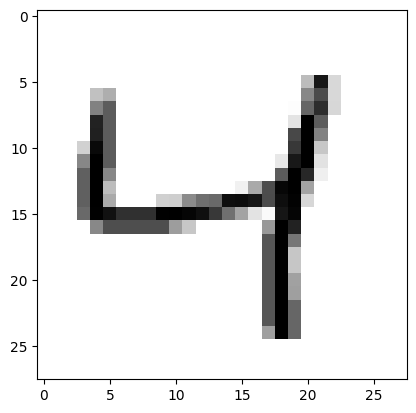

In [8]:
digit = 2
a = train_imgs[digit]
plt.imshow(a, cmap='gray_r')
print(f"The label of this image is: {train_labels[digit]}")

In [9]:

model = keras.Sequential([
    keras.Input(shape=(28*28,)),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax'),
    ])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
h = model.fit(x=train_imgs_norm, y=train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8655 - loss: 0.4773 - val_accuracy: 0.9627 - val_loss: 0.1252
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9666 - loss: 0.1087 - val_accuracy: 0.9715 - val_loss: 0.0982
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9806 - loss: 0.0651 - val_accuracy: 0.9710 - val_loss: 0.0947
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9867 - loss: 0.0444 - val_accuracy: 0.9728 - val_loss: 0.0906
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0337 - val_accuracy: 0.9753 - val_loss: 0.0884
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0252 - val_accuracy: 0.9716 - val_loss: 0.1043
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9937 - loss: 0.0193 - val_accuracy: 0.9772 - val_loss: 0.0860
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9940 - loss: 0.0175 - val_accuracy: 0.

In [12]:

model.save("mnist_dense_model.keras")